In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [35]:
# https://stackoverflow.com/questions/19206332/gaussian-fit-for-python

def gaussian1(x,x0,amp,sigma):
    A = amp/np.sqrt(2*np.pi)*sigma
    return A*np.exp(-(x-x0)**2/(2*sigma**2))

In [33]:
# http://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html
# Check the above link for info on using FITS in python.

bias_f = 'D_n20131112t1127_c13_r1472p01_biascor.fits'
flat_f = 'D_n20131112t1127_r_c13_r1472p01_dflatcor.fits'
des_f = 'DECam_00380036_09.fits'
header = fits.getheader('DECam_00380036_09.fits')

bias = fits.getdata(bias_f, ext = 0)
flat = fits.getdata(flat_f, ext = 0)
des = fits.getdata(des_f, ext = 0)


In [25]:
#### DON'T WORRY ABOUT THIS SECTION.  THIS IS COMPLICATED STUFF  ####
#### THAT I HAD TO DO FOR CLASS. THIS JUST CUTS OFF THE DATA     ####
#### AT CERTAIN PIXELS BECAUSE OF THE MAUFACTURING OF THE CAMERA ####

oScanA_beg = 2105; oScanA_end = 2154;
oScanB_beg = 7; oScanB_end = 56;
sciB_beg = 57; sciB_end = 1080;
sciA_beg = 1081; sciA_end= 2104;
des_sub = np.zeros([4096, 2048])
y_start = 51

i = 0
for row in des:
    medB = np.median(row[oScanB_beg-1:oScanB_end])
    medA = np.median(row[oScanA_beg-1:oScanA_end])
    subRow = np.zeros([2048])
    if i > y_start-1:
        for j in range(len(row)):
            if j < sciB_end and j > sciB_beg +1:
                subRow[j-57] = row[j] - medB
            elif j < sciA_end:
                subRow[j-57] = row[j] - medA
        des_sub[i- 51] = subRow
    i+=1

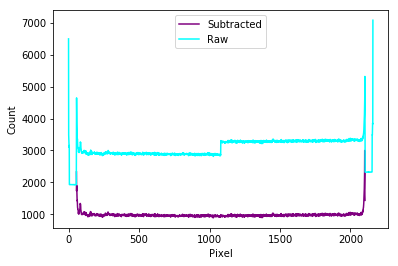

In [32]:
# We want to check that our subtraction was correct. Let's check by plotting a row of data

plt.plot(range(56, 2104), <subtracted row>, color = 'purple', label = 'Subtracted')
plt.plot(range(<values to plot>), <raw row>, color = 'cyan', label = 'Raw')
plt.xlabel('Pixel') # Here is how you set axes labels.
plt.ylabel('Count')
plt.title('Subtraction Check') # Here is how you write a title for your plot
plt.legend() # This adds a legend
plt.savefig('ampBias.png') # This saves your figure.  


In [30]:
# to get the final reduction, you need to subtract out the bias and divivde by the flat. 
finData = 

array([[-5.99403626e+03,  4.62017702e+02,  2.98119732e+02, ...,
         8.81601030e+01,  1.34624123e+01, -3.47149433e+04],
       [-1.43930929e+04,  8.54867511e+02,  3.05434366e+02, ...,
         4.05924573e+01,  3.02848655e+01, -2.95842305e+04],
       [-1.62106568e+04,  1.40430968e+03,  3.10254731e+02, ...,
         3.01132796e+01,  5.09582979e+01, -2.54919643e+04],
       ...,
       [ 4.95801356e+05,  6.42106363e+02,  3.73495851e+02, ...,
         3.49177019e+02,  1.79503847e+01, -2.19537862e+05],
       [-1.64459310e+04,  4.29313488e+02,  4.62477665e+02, ...,
         7.49093460e+02,  3.86868970e+02, -8.18589878e+03],
       [-5.74477677e+01, -1.95436484e+01, -2.75064322e+01, ...,
        -2.49551253e+01, -2.17764891e+01, -1.34141950e+02]])

In [34]:
# Writing the Fits file
hdu = fits.PrimaryHDU() #We want our data to be the primary thing fits looks at
hdu.<function> = <your final data> #Set the data option of the hdu equal to our final data product
hdu.header = header #The fits header is important. It tells us everything we need to know anout the data. Keep it the same from before
hdu.header[<field>] = <yourname> # We can still edit it though.  Create the AUTHOR field
hdu.<function>(<filename>, overwrite=True) # Finally write to a fits file